In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
# %load_ext nb_black
# notebook setup

from pathlib import Path
import sys

sys.path.insert(0, Path().absolute().parent.as_posix())

/Users/ruizhechao/Documents/NNforHJB


/Users/ruizhechao/Documents/NNforHJB/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# model_name_l2 =
# model_name_h1 =  

In [3]:
# load the data
import numpy as np

path = 'rawdata/raw_data/VDP_beta_0.1_grid_30x30.npy'
data = np.load(path)
data.dtype

dtype([('x', '<f8', (2,)), ('dv', '<f8', (2,)), ('v', '<f8')])

In [4]:
# prepare the data
# data is a structured numpy array with fields: 'x', 'dv', 'v'
# convert to the dict format expected by model._prepare_data

data_dict = {
    "x": np.asarray(data["x"], dtype=np.float64),    # shape (N, 2)
    "v": np.asarray(data["v"], dtype=np.float64),    # shape (N,)
    "dv": np.asarray(data["dv"], dtype=np.float64),  # shape (N, 2)
}

### Test the PDPA algorithm

In [5]:
import torch
from scr.PDPA import PDPA

# pdpa_1 = PDPA(
#     data = data_dict,
#     alpha = 1e-3, 
#     gamma = 5.0,
#     power = 2.1,
#     activation = torch.relu,
#     loss_weights = [1.0, 0.0],
#     verbose=True
# )

# best_iteration_1 = pdpa_1.retrain(
#     num_iterations = 40, 
#     num_insertion= 1, 
#     threshold = 1e-10,
#     )

In [6]:
# best_iteration_1

## Test effect of different gamma with increased neurons added

In [7]:
gammas = [10.0, 5.0, 1.0, 1e-1, 1e-2]
alpha = 1e-3
power = 2.1
loss_weight_h1 = [1.0, 1.0]
loss_weight_l2 = [1.0, 0.0]

num_iterations = 40
num_insertions = 1
pruning_threshold = 1e-10

In [8]:
pdpa_list_l2 = []
best_iteration_l2 = []
for gamma in gammas:
    pdpa = PDPA(
        data=data_dict,
        alpha=alpha,
        gamma=gamma,
        power=power,
        activation=torch.relu,
        loss_weights=loss_weight_l2,
        verbose=False,
    )

    best_iteration = pdpa.retrain(
    num_iterations = num_iterations, 
    num_insertion= num_insertions, 
    threshold = pruning_threshold,
    verbose=False
    )

    pdpa_list_l2.append(pdpa)
    best_iteration_l2.append(best_iteration)


In [9]:
best_iteration_l2

[29, 39, 15, 35, 2]

In [10]:
pdpa_list_h1 = []
best_iteration_h1 = []

for gamma in gammas:
    pdpa = PDPA(
        data=data_dict,
        alpha=alpha,
        gamma=gamma,
        power=power,
        activation=torch.relu,
        loss_weights=loss_weight_h1,
        verbose=False,
    )

    best_iteration = pdpa.retrain(
    num_iterations = num_iterations, 
    num_insertion= num_insertions, 
    threshold = pruning_threshold,
    verbose=False
    )

    pdpa_list_h1.append(pdpa)
    best_iteration_h1.append(best_iteration)

In [11]:
best_iteration_h1

[19, 31, 22, 36, 39]

In [12]:
import pickle

model_l2 = {
    "gammas": gammas,
    "pdpa_list_l2": pdpa_list_l2,
    "alpha": alpha,
    "power": power,
    "num_iteration": num_iterations,
    "num_insertion": num_insertions,
    "pruning_threshold": pruning_threshold,
    "best_iteration_l2": best_iteration_l2,
}

model_h1 = {
    "gammas": gammas,
    "pdpa_list_h1": pdpa_list_h1,
    "alpha": alpha,
    "power": power,
    "num_iteration": num_iterations,
    "num_insertion": num_insertions,
    "pruning_threshold": pruning_threshold,
    "best_iteration_h1": best_iteration_h1,
}

with open("models/pdpa_vdp_model_l2_7.pkl", "wb") as f:
    pickle.dump(model_l2, f)

with open("models/pdpa_vdp_model_h1_7.pkl", "wb") as f:
    pickle.dump(model_h1, f)


In each iteration we tried to add 5 neurons. The following plots indicates the relation of loss & number of neurons. 

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'PDPA validation loss history by γ'}, xlabel='Iteration', ylabel='Validation loss'>)

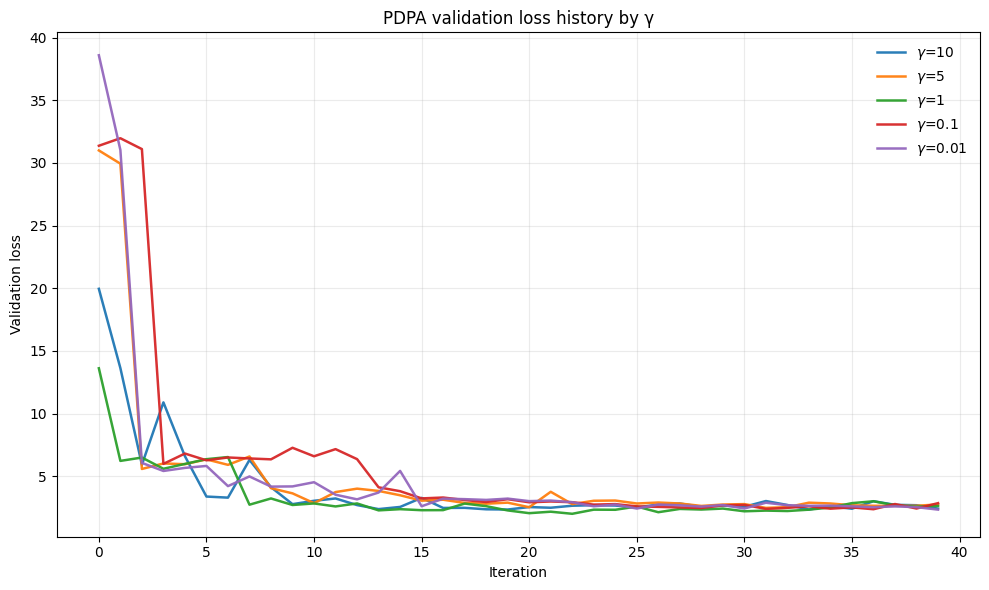

In [13]:
from scr.metric import plot_pdpa_val_loss_histories_by_gamma

plot_pdpa_val_loss_histories_by_gamma(model_h1)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'PDPA validation loss history by γ'}, xlabel='Iteration', ylabel='Validation loss'>)

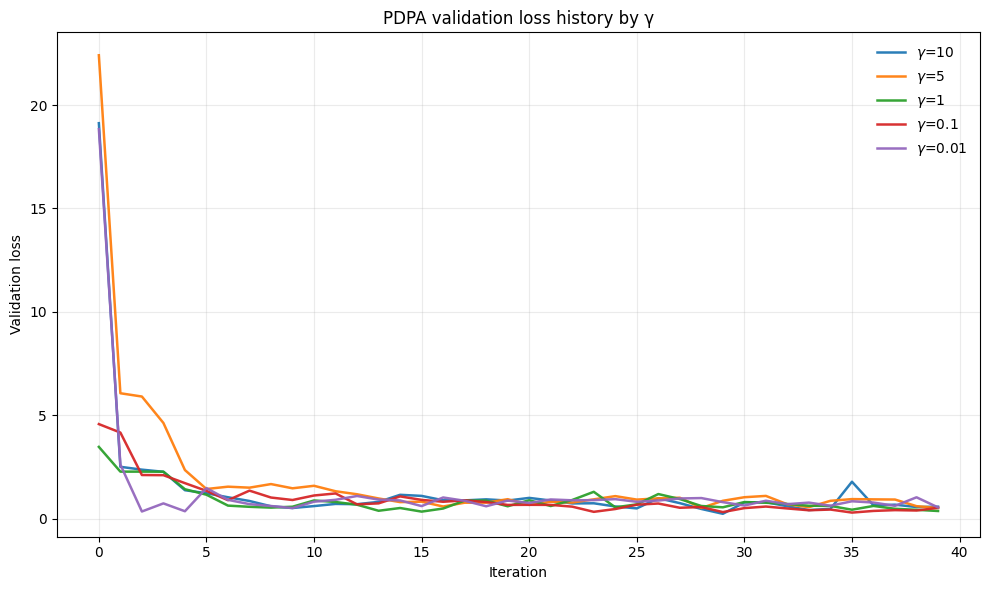

In [14]:
plot_pdpa_val_loss_histories_by_gamma(model_l2, pdpa_key="pdpa_list_l2")